In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13969, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 13969 (delta 122), reused 103 (delta 69), pack-reused 13783
Receiving objects: 100% (13969/13969), 13.57 MiB | 27.73 MiB/s, done.
Resolving deltas: 100% (9564/9564), done.


In [2]:

%cd yolov5/


/content/yolov5


In [ ]:
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

!mkdir "/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/images"


mkdir: cannot create directory ‘/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/images’: File exists


In [4]:
imgs = os.listdir('/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/images')
imgs_train, imgs_val = train_test_split(imgs, test_size=0.05)

df = pd.read_csv('/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/annotation.csv')

In [5]:
import yaml
cwd = '/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/'
data = dict(
    train =  cwd + 'train.txt',
    val   =  cwd + 'val.txt',
    nc    = 1,
    names = ['licence'],
)

with open(cwd + 'bgr.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)
with open(cwd + 'train.txt', 'w') as f:
    for path in imgs_train:
        f.write(cwd+'images/'+path+'\n')
with open(cwd + 'val.txt', 'w') as f:
    for path in imgs_val:
        f.write(cwd+'images/'+path+'\n')

In [6]:
for file in imgs:
    file = file.split('.')[0]
    bboxs = []
    for _,row in df[df['file'] == file].iterrows():
        bbox = [str(0), str(row['Xcent']), str(row['Ycent']), str(row['boxW']), str(row['boxH'])]
        bbox = ' '.join(bbox)
        bboxs.append(bbox)
    with open(cwd+'labels/'+file+'.txt', 'w') as f:
        bboxs = '\n'.join(bboxs)
        f.write(bboxs)

In [ ]:
!python train.py --img 1280\
--batch 10\
--epochs 50\
--data /content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/bgr.yaml\
--weights yolov5m6.pt

train: weights=yolov5m6.pt, cfg=, data=/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/bgr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-262-g9286336 Python-3.7.15 torch-1.13.0+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)


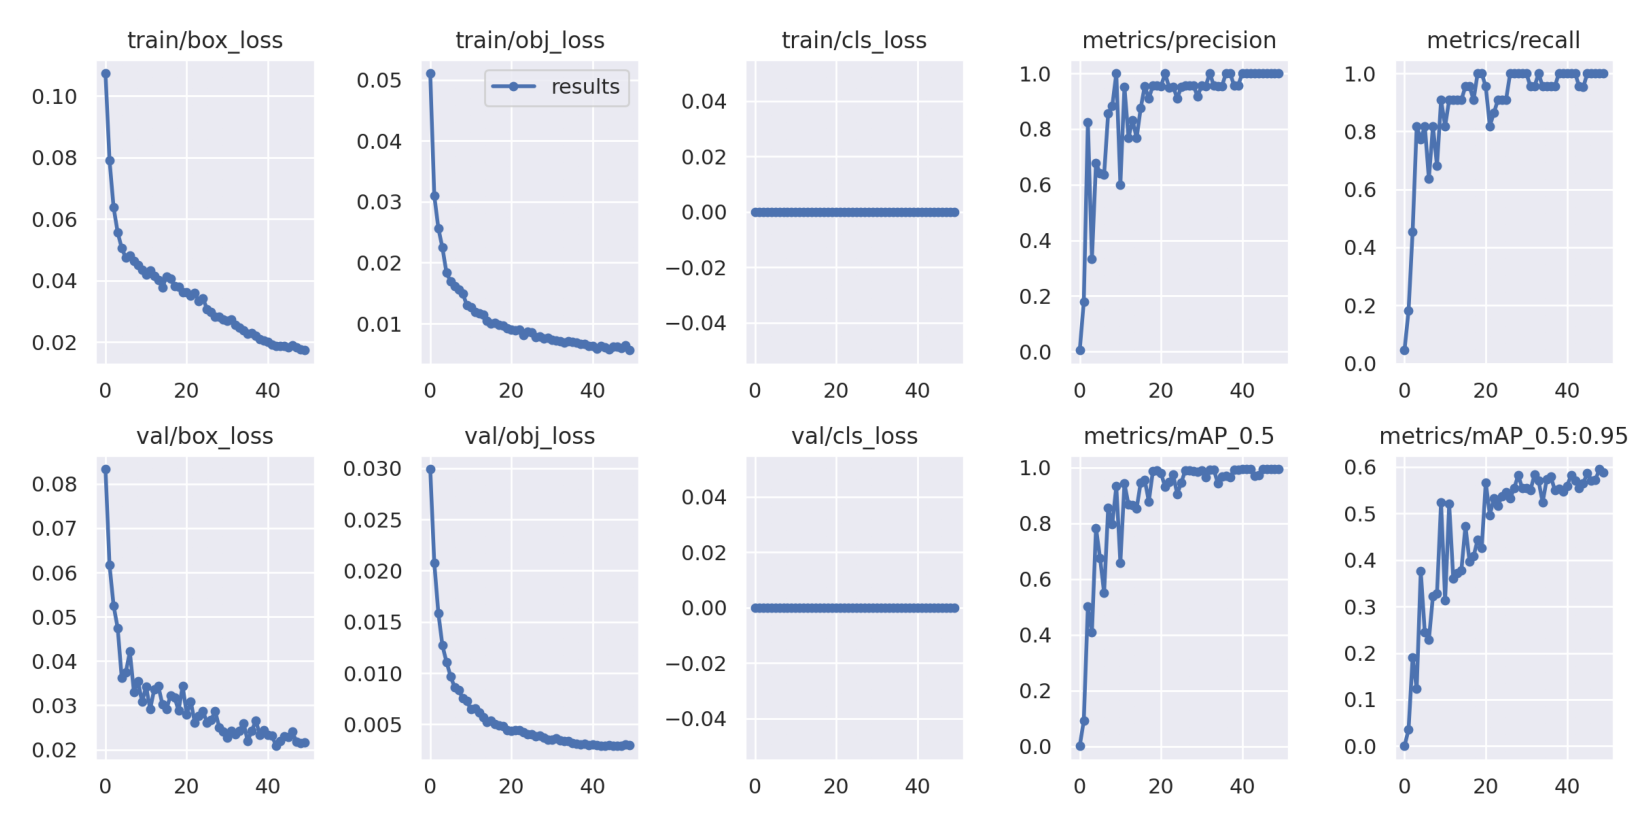

In [7]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/results.png'))

In [8]:
# from google.colab.patches import cv2_imshow
# from PIL import Image
# import random
# from google.colab.patches import cv2_imshow
# from PIL import Image
# !pip install --upgrade pillow

# !pip install -U pillow
!pip install -U pytesseract

import cv2
import pytesseract
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 30.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


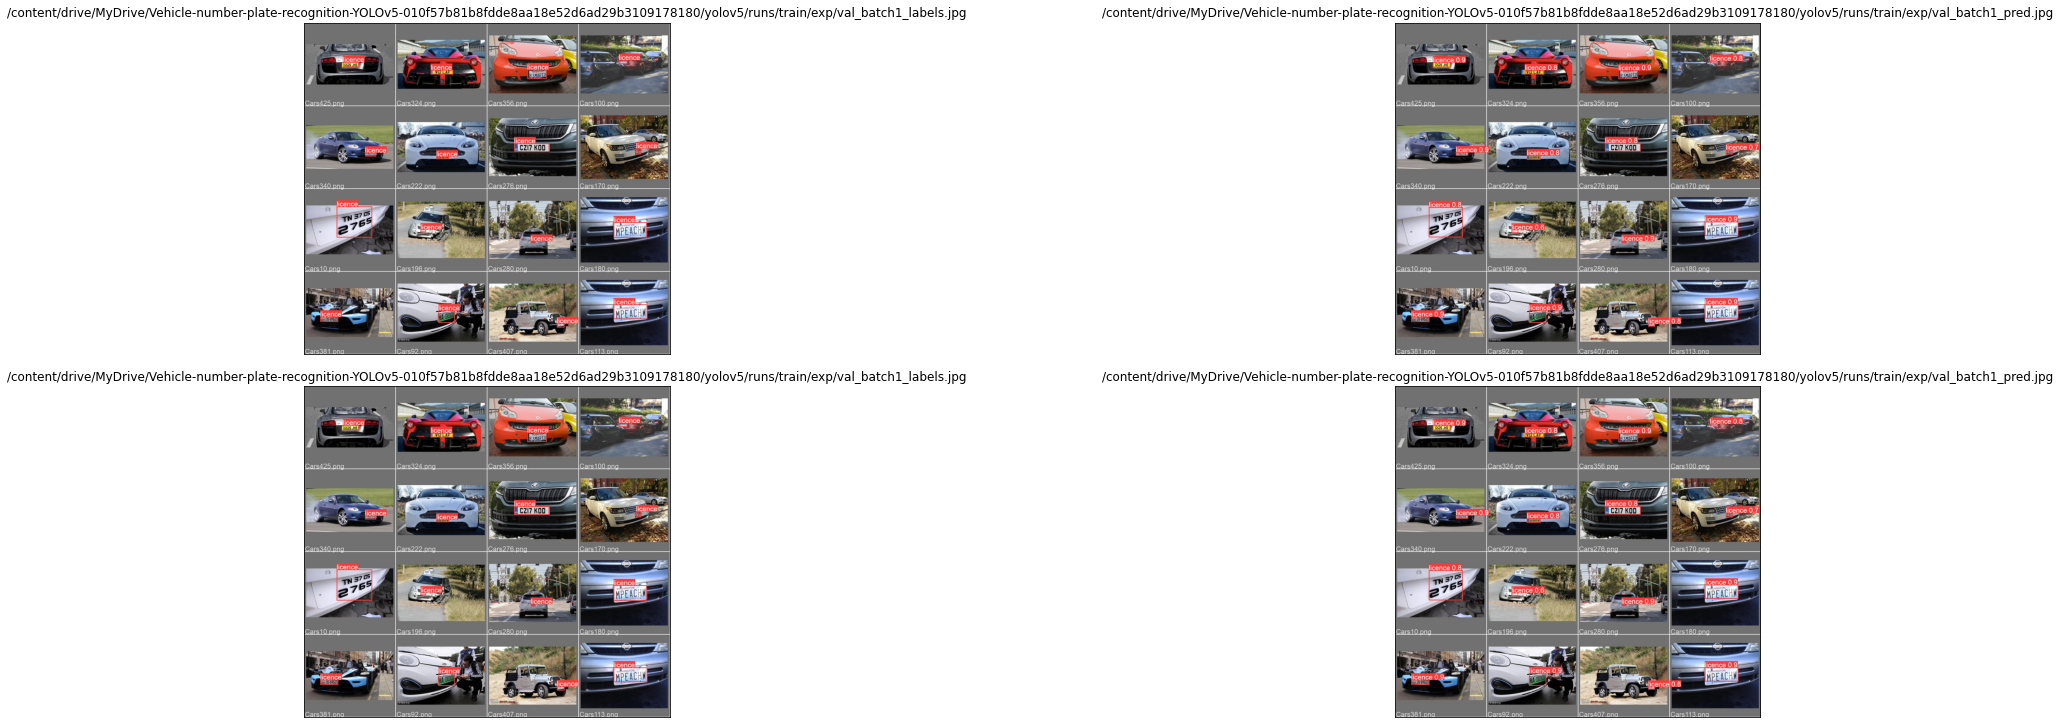

In [1]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize = (2*15,2*5), constrained_layout = True)
for row in range(2):
    ax[row][0].imshow(plt.imread(f'/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/val_batch0_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/val_batch1_labels.jpg', fontsize = 12)

    ax[row][1].imshow(plt.imread(f'/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/val_batch0_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/val_batch1_pred.jpg', fontsize = 12)
plt.show()

In [ ]:
import torch
from PIL import Image
!pip install --ignore-installed Pillow==9.0.0

CKPT_PATH = '/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5/runs/train/exp/weights/best.pt'
yolov5 = torch.hub.load('/content/drive/MyDrive/Vehicle-number-plate-recognition-YOLOv5-010f57b81b8fdde8aa18e52d6ad29b3109178180/yolov5',
                        'custom',
                        path=CKPT_PATH,
                        source='local',
                        force_reload=True)

'confidence: ' + str(yolov5.conf)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)


'confidence: 0.25'

In [ ]:
# !pip install torchvision==0.10.1
# !pip install torch==1.9.1
# !pip install imbalanced-learn

from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer